# import

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D

In [3]:
# Завантаження даних
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
origin_dim = x_train.shape[1]

# Нормалізація
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshape to flat
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

x_train_flat.shape

(60000, 784)

In [3]:
# AE
def create_autoencoder(hp):
    lat_dim_ae = hp.Int('lat_dim', min_value=10, max_value=100, step=5)
    
    input_shape = (28, 28, 1)

    # Encoder
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(
        inputs)  # Output: 28x28 (avoid information loss)
    x = MaxPooling2D((2, 2), padding='valid')(x)  # Output: 14x14
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(
        x)  # Output: 14x14 (avoid information loss)
    x = MaxPooling2D((2, 2), padding='valid')(x)  # Output: 7x7
    x = Flatten()(x)
    encoded = Dense(lat_dim_ae)(x)

    # Decoder (adjusted based on encoder output)
    # Match the number of channels in the next Conv2D layer
    x = Dense(7 * 7 * 64)(encoded)
    x = Reshape((7, 7, 64))(x)
    x = Conv2D(64, (3, 3), activation='relu',
                padding='same')(x)  # Output: 7x7
    x = UpSampling2D((2, 2))(x)  # Output: 14x14
    x = Conv2D(32, (3, 3), activation='relu',
                padding='same')(x)  # Output: 14x14
    # Output: 28x28 (matches input height and width)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid',
                        padding='same')(x)  # Output: 28x28x1

    # Create the autoencoder model
    autoencoder = tf.keras.Model(inputs, decoded)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mse')
    
    return autoencoder

# Search optimal parametrs

## svd

In [8]:
steps = [
         ('SVD', TruncatedSVD()),
         ('MLP', MLPClassifier(solver="lbfgs"))]
pipeline = Pipeline(steps)

param_grid = {
    'SVD__n_components': list(range(10,160,10)),
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, scoring='accuracy', return_train_score=True, verbose=2)
grid_search.fit(x_train_flat, y_train)

results = pd.DataFrame(grid_search.cv_results_)
results

Fitting 2 folds for each of 15 candidates, totalling 30 fits


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=10; total time=   8.3s


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=10; total time=   8.2s


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=20; total time=   8.7s


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=20; total time=   8.9s


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=30; total time=   8.8s


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=30; total time=   9.1s
[CV] END ...............................SVD__n_components=40; total time=   8.5s


c:\Users\Kolyanys\miniconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV] END ...............................SVD__n_components=40; total time=   9.3s
[CV] END ...............................SVD__n_components=50; total time=   8.1s
[CV] END ...............................SVD__n_components=50; total time=   7.4s
[CV] END ...............................SVD__n_components=60; total time=   7.3s
[CV] END ...............................SVD__n_components=60; total time=   7.7s
[CV] END ...............................SVD__n_components=70; total time=   7.0s
[CV] END ...............................SVD__n_components=70; total time=   7.8s
[CV] END ...............................SVD__n_components=80; total time=   7.7s
[CV] END ...............................SVD__n_components=80; total time=   7.3s
[CV] END ...............................SVD__n_components=90; total time=   7.8s
[CV] END ...............................SVD__n_components=90; total time=   7.2s
[CV] END ..............................SVD__n_components=100; total time=   7.3s
[CV] END ...................

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SVD__n_components,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,8.329342,0.065191,0.062995,0.007996,10,{'SVD__n_components': 10},0.920900,0.926067,0.923483,0.002583,15,0.936633,0.939933,0.938283,0.001650
1,8.830513,0.070080,0.055999,0.001001,20,{'SVD__n_components': 20},0.961200,0.961333,0.961267,0.000067,14,0.994233,0.991733,0.992983,0.001250
2,8.988744,0.109088,0.062000,0.001001,30,{'SVD__n_components': 30},0.966900,0.967767,0.967333,0.000433,9,0.999967,1.000000,0.999983,0.000017
3,8.908273,0.398763,0.062001,0.002000,40,{'SVD__n_components': 40},0.967000,0.966800,0.966900,0.000100,11,1.000000,1.000000,1.000000,0.000000
4,7.759590,0.326055,0.069704,0.001822,50,{'SVD__n_components': 50},0.966533,0.965133,0.965833,0.000700,13,1.000000,1.000000,1.000000,0.000000
5,7.496187,0.181125,0.070695,0.002699,60,{'SVD__n_components': 60},0.966700,0.969500,0.968100,0.001400,5,1.000000,1.000000,1.000000,0.000000
6,7.418557,0.361856,0.076500,0.002501,70,{'SVD__n_components': 70},0.969933,0.969233,0.969583,0.000350,1,1.000000,1.000000,1.000000,0.000000
7,7.558752,0.197938,0.078000,0.000998,80,{'SVD__n_components': 80},0.969067,0.968067,0.968567,0.000500,3,1.000000,1.000000,1.000000,0.000000
8,7.527486,0.312560,0.077997,0.002002,90,{'SVD__n_components': 90},0.970233,0.967367,0.968800,0.001433,2,1.000000,1.000000,1.000000,0.000000
9,7.151305,0.132112,0.092782,0.004215,100,{'SVD__n_components': 100},0.968633,0.968233,0.968433,0.000200,4,1.000000,1.000000,1.000000,0.000000


In [9]:
results2 = results[['param_SVD__n_components', 'mean_test_score', 'rank_test_score', 'mean_fit_time', 'mean_score_time']]
results2

,param_SVD__n_components,mean_test_score,rank_test_score,mean_fit_time,mean_score_time
0,10,0.923483,15,8.329342,0.062995
1,20,0.961267,14,8.830513,0.055999
2,30,0.967333,9,8.988744,0.062000
3,40,0.966900,11,8.908273,0.062001
4,50,0.965833,13,7.759590,0.069704
5,60,0.968100,5,7.496187,0.070695
6,70,0.969583,1,7.418557,0.076500
7,80,0.968567,3,7.558752,0.078000
8,90,0.968800,2,7.527486,0.077997
9,100,0.968433,4,7.151305,0.092782


## AE

In [5]:
tuner = RandomSearch(
    create_autoencoder,
    objective='val_loss',
    # max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='autoencoders')

# Пошук найкращих гіперпараметрів
tuner.search(x_train, x_train, epochs=12, validation_data=(x_test, x_test))

# Отримання найкращої моделі
best_model = tuner.get_best_models(num_models=1)[0]
best_model

Trial 6 Complete [00h 02m 08s]
val_loss: 0.011847252026200294

Best val_loss So Far: 0.001603180542588234
Total elapsed time: 00h 12m 55s

Search: Running Trial #7

Value             |Best Value So Far |Hyperparameter
80                |100               |lat_dim

Epoch 1/12
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0117 - val_loss: 0.0042
Epoch 2/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 3/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0029 - val_loss: 0.0026
Epoch 4/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 5/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 6/12
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/12
 465/1875 [======>.......................] - ETA: 7s - loss: 0.0020

KeyboardInterrupt: 

In [11]:
tuner.results_summary()

Results summary
Results in my_dir\autoencoders
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 3 summary
Hyperparameters:
lat_dim: 40
Score: 0.006121774359295766

Trial 4 summary
Hyperparameters:
lat_dim: 32
Score: 0.007061885514607032

Trial 1 summary
Hyperparameters:
lat_dim: 20
Score: 0.010206700613101324

Trial 0 summary
Hyperparameters:
lat_dim: 12
Score: 0.014960265718400478

Trial 2 summary
Hyperparameters:
lat_dim: 8
Score: 0.019947337607542675


In [12]:
results = pd.DataFrame(tuner.oracle.get_best_trials(num_trials=len(tuner.oracle.trials)))
results

,0
0,<keras_tuner.src.engine.trial.Trial object at ...
1,<keras_tuner.src.engine.trial.Trial object at ...
2,<keras_tuner.src.engine.trial.Trial object at ...
3,<keras_tuner.src.engine.trial.Trial object at ...
4,<keras_tuner.src.engine.trial.Trial object at ...


# charts

### svd

C:\Users\Kolyanys\AppData\Local\Temp\ipykernel_14808\2149687483.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


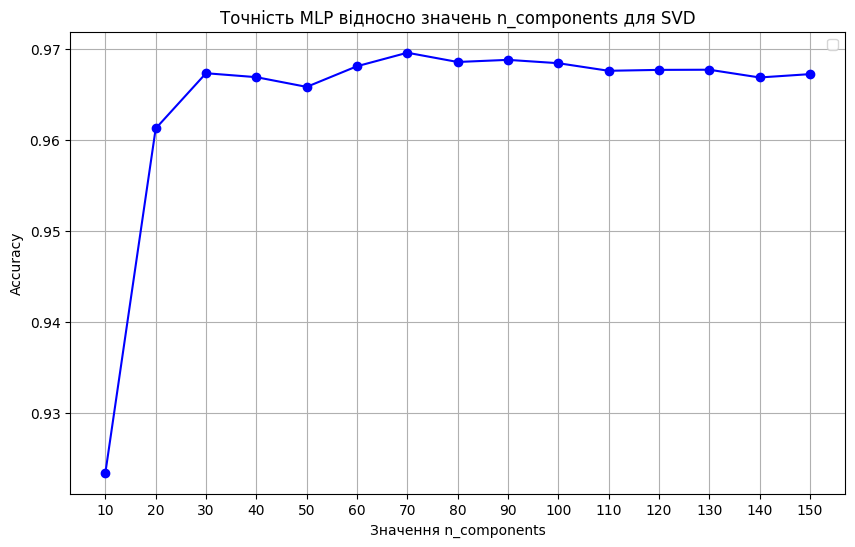

In [25]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['mean_test_score']], marker='o', color='blue')

plt.xlabel('Значення n_components')
plt.ylabel('Accuracy')
plt.title('Точність MLP відносно значень n_components для SVD')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

C:\Users\Kolyanys\AppData\Local\Temp\ipykernel_14808\1554319907.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


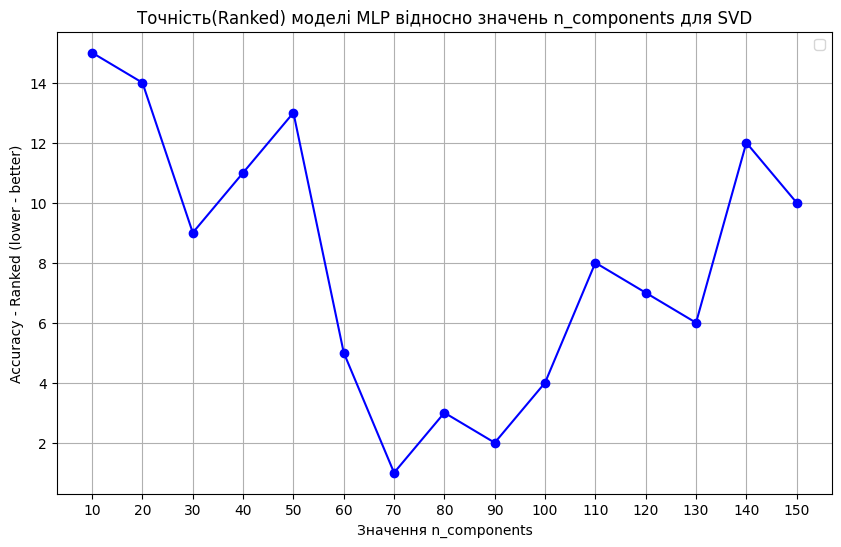

In [27]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['rank_test_score']], marker='o', color='blue')

plt.xlabel('Значення n_components')
plt.ylabel('Accuracy - Ranked (lower - better)')
plt.title('Точність(Ranked) моделі MLP відносно значень n_components для SVD')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

C:\Users\Kolyanys\AppData\Local\Temp\ipykernel_14808\2559225631.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


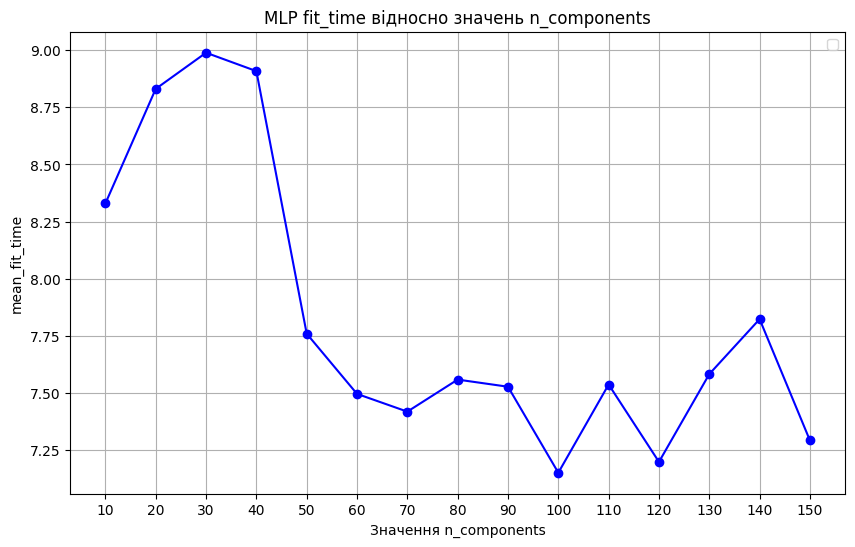

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['mean_fit_time']], marker='o', color='blue')

plt.xlabel('Значення n_components')
plt.ylabel('mean_fit_time')
plt.title('MLP fit_time відносно значень n_components для SVD')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

C:\Users\Kolyanys\AppData\Local\Temp\ipykernel_14808\1284146590.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


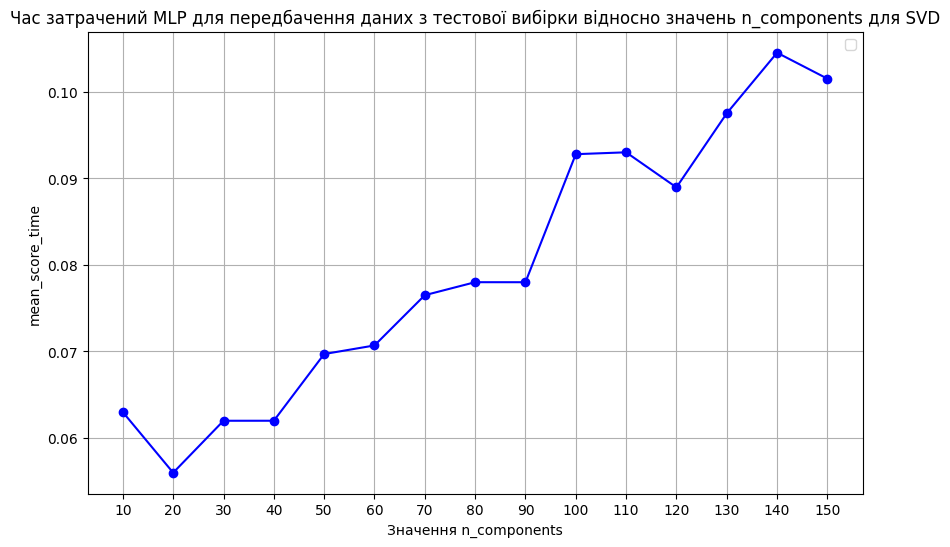

In [26]:
plt.figure(figsize=(10, 6))

plt.plot(results[['param_SVD__n_components']], results[['mean_score_time']], marker='o', color='blue')

plt.xlabel('Значення n_components')
plt.ylabel('mean_score_time')
plt.title('Час затрачений MLP для передбачення даних з тестової вибірки відносно значень n_components для SVD')
plt.xticks(results['param_SVD__n_components'].tolist())
plt.grid(True)
plt.legend()

plt.show()

### AE - custom

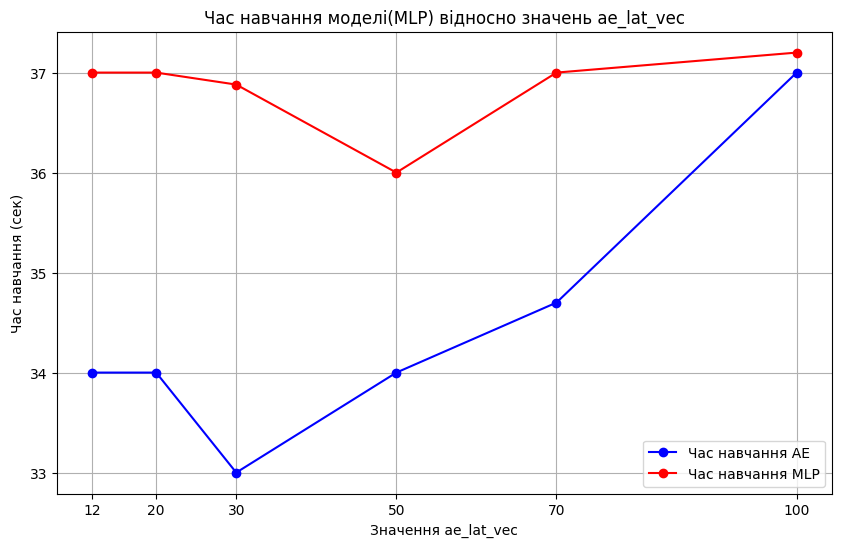

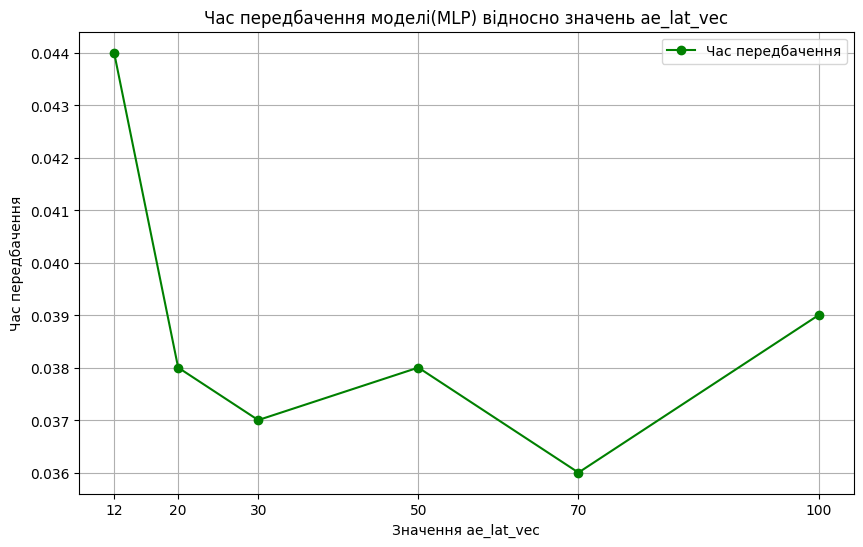

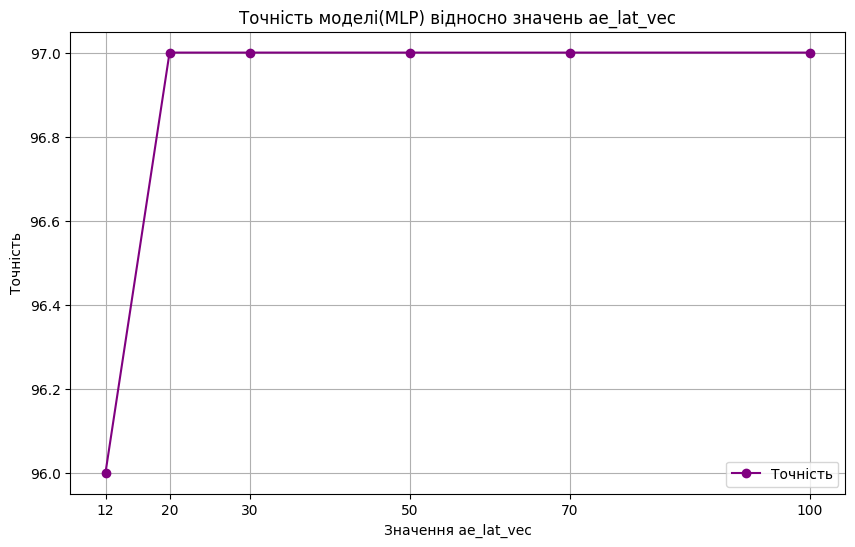

In [18]:
import matplotlib.pyplot as plt

# Значення параметрів
lat_vec =           [12, 20, 30, 50, 70, 100]
ae_training_time =  [34, 34, 33, 34, 34.7, 37]  # Час навчання AE
mlp_training_time = [37, 37, 36.88, 36, 37, 37.2]  # Час навчання MLP
prediction_time =   [0.044, 0.038, 0.037, 0.038, 0.036, 0.039]  # Час передбачення
accuracy =          [96, 97, 97, 97, 97, 97]  # Точність

# Побудова графіку для часу навчання AE та MLP
plt.figure(figsize=(10, 6))

plt.plot(lat_vec, ae_training_time, marker='o', color='blue', label='Час навчання AE')
plt.plot(lat_vec, mlp_training_time, marker='o', color='red', label='Час навчання MLP')

plt.xlabel('Значення ae_lat_vec')
plt.ylabel('Час навчання (сек)')
plt.title('Час навчання моделі(MLP) відносно значень ae_lat_vec')
plt.xticks(lat_vec)
plt.grid(True)
plt.legend()

plt.show()

# Побудова графіку для часу передбачення
plt.figure(figsize=(10, 6))

plt.plot(lat_vec, prediction_time, marker='o', color='green', label='Час передбачення')

plt.xlabel('Значення ae_lat_vec')
plt.ylabel('Час передбачення')
plt.title('Час передбачення моделі(MLP) відносно значень ae_lat_vec')
plt.xticks(lat_vec)
plt.grid(True)
plt.legend()

plt.show()

# Побудова графіку для точності
plt.figure(figsize=(10, 6))


plt.plot(lat_vec, accuracy, marker='o', color='purple', label='Точність')

plt.xlabel('Значення ae_lat_vec')
plt.ylabel('Точність')
plt.title('Точність моделі(MLP) відносно значень ae_lat_vec')
plt.xticks(lat_vec)
plt.grid(True)
plt.legend()

plt.show()
